In [213]:
import pandas as pd

In [2]:
ambev = pd.read_csv("ABEV3-739-985-performance.csv")

In [3]:
ambev

,Unnamed: 0,0
0,Prophet-return,-0.016440
1,Prophet-rise-accuracy,0.375000
2,Prophet-fall-accuracy,0.631148
3,Prophet-total-rise-fall-accuracy,0.504132
4,Prophet-rmse,1.143163
5,Prophet-mape,0.057755
6,Prophet-mae,0.774055
7,SVR-return,-0.010444
8,SVR-rise-accuracy,0.525000
9,SVR-fall-accuracy,0.565574


In [13]:
mask_func = lambda x: x.split("-")[0]

mask_func = np.vectorize(mask_func)

In [14]:
ambev["Algorithm"] = mask_func(ambev["Unnamed: 0"].to_numpy())
ambev

,Unnamed: 0,0,Algorithm
0,Prophet-return,-0.016440,Prophet
1,Prophet-rise-accuracy,0.375000,Prophet
2,Prophet-fall-accuracy,0.631148,Prophet
3,Prophet-total-rise-fall-accuracy,0.504132,Prophet
4,Prophet-rmse,1.143163,Prophet
5,Prophet-mape,0.057755,Prophet
6,Prophet-mae,0.774055,Prophet
7,SVR-return,-0.010444,SVR
8,SVR-rise-accuracy,0.525000,SVR
9,SVR-fall-accuracy,0.565574,SVR


In [16]:
ambev["Stock"] = "AMBEV"

In [38]:
tuples = [(column.split("-")[0], " ".join(column.split("-")[1:])) for column in ambev["Unnamed: 0"]]

In [39]:
tuples

[('Prophet', 'return'),
 ('Prophet', 'rise accuracy'),
 ('Prophet', 'fall accuracy'),
 ('Prophet', 'total rise fall accuracy'),
 ('Prophet', 'rmse'),
 ('Prophet', 'mape'),
 ('Prophet', 'mae'),
 ('SVR', 'return'),
 ('SVR', 'rise accuracy'),
 ('SVR', 'fall accuracy'),
 ('SVR', 'total rise fall accuracy'),
 ('SVR', 'rmse'),
 ('SVR', 'mape'),
 ('SVR', 'mae'),
 ('ARIMA', 'return'),
 ('ARIMA', 'rise accuracy'),
 ('ARIMA', 'fall accuracy'),
 ('ARIMA', 'total rise fall accuracy'),
 ('ARIMA', 'rmse'),
 ('ARIMA', 'mape'),
 ('ARIMA', 'mae'),
 ('MLP', 'return'),
 ('MLP', 'rise accuracy'),
 ('MLP', 'fall accuracy'),
 ('MLP', 'total rise fall accuracy'),
 ('MLP', 'rmse'),
 ('MLP', 'mape'),
 ('MLP', 'mae')]

In [53]:
ambev["0"].to_numpy().reshape(1, -1)

array([[-0.01644001,  0.375     ,  0.63114754,  0.50413223,  1.14316313,
         0.0577551 ,  0.77405521, -0.01044385,  0.525     ,  0.56557377,
         0.54545455,  0.64651365,  0.03285512,  0.43166818, -0.04170343,
         0.53333333,  0.57377049,  0.55371901,  0.4197448 ,  0.02316915,
         0.30496758,  0.01634246,  0.6       ,  0.50819672,  0.55371901,
         0.58567965,  0.03310645,  0.4382717 ]])

In [52]:
test.shape

(1, 28)

In [233]:
files = [
    ("ABEV3", "ABEV3-491-737-performance.csv"),
    ("B3SA3", "B3SA3-491-737-performance.csv"),
    ("BBDC4", "BBDC4-491-737-performance.csv"),
    ("ITSA4","ITSA4-491-737-performance.csv"),
    ("ITUB4","ITUB4-491-737-performance.csv"),
    ("MGLU3","MGLU3-491-737-performance.csv"),
    ("PETR3","PETR3-491-737-performance.csv"),
    ("PETR4","PETR4-491-737-performance.csv"),
    ("VALE3","VALE3-491-737-performance.csv"),
    ("WEGE3","WEGE3-491-737-performance.csv")
]
performance_df = pd.DataFrame()
for stock, file in files:
    temp_df = pd.read_csv(file)
    tuples = [(column.split("-")[0], " ".join(column.split("-")[1:])) for column in temp_df["Unnamed: 0"]]
    index = pd.MultiIndex.from_tuples(tuples, names=["Algorithm", "Metrics"])
    temp_performance_df = pd.DataFrame(temp_df["0"].to_numpy().reshape(1, -1), index=[stock],columns=index)
    performance_df = pd.concat([performance_df, temp_performance_df])

In [234]:
performance_df

Algorithm   Prophet                                                       \
Metrics      return rise accuracy fall accuracy total rise fall accuracy   
ABEV3     -0.017625      0.422764      0.620690                 0.518828   
B3SA3     -0.004366      0.386861      0.613208                 0.485597   
BBDC4     -0.010006      0.354839      0.540984                 0.447154   
ITSA4     -0.016053      0.427419      0.584746                 0.504132   
ITUB4     -0.015306      0.395161      0.644628                 0.518367   
MGLU3      0.000756      0.465116      0.637931                 0.546939   
PETR3     -0.014838      0.363636      0.566372                 0.457143   
PETR4     -0.007665      0.375000      0.586207                 0.475410   
VALE3     -0.012124      0.425197      0.606838                 0.512295   
WEGE3      0.000571      0.368794      0.606061                 0.466667   

Algorithm                                     SVR                              \
Metrics        rmse      mape       mae    return rise accuracy fall accuracy   
ABEV3      1.279631  0.046870  0.801401  0.009202      0.439024      0.543103   
B3SA3      0.867453  0.047493  0.563854  0.007086      0.474453      0.632075   
BBDC4      2.007853  0.047372  1.278639  0.025930      0.475806      0.418033   
ITSA4      0.847659  0.045661  0.529301  0.013369      0.475806      0.559322   
ITUB4      2.434578  0.047384  1.547524  0.020926      0.532258      0.528926   
MGLU3      0.583513  0.052271  0.392776  0.029418      0.426357      0.551724   
PETR3      2.116171  0.047622  1.349866 -0.007234      0.393939      0.504425   
PETR4      1.881375  0.047665  1.216235  0.000426      0.437500      0.612069   
VALE3      3.637933  0.053009  2.299474  0.047667      0.503937      0.564103   
WEGE3      0.771288  0.044545  0.483003  0.006504      0.375887      0.585859   

Algorithm  ...     ARIMA                           MLP                \
Metrics    ...      rmse      mape       mae    return rise accuracy   
ABEV3      ...  0.300534  0.012516  0.213753  0.011018      0.504065   
B3SA3      ...  0.259984  0.017178  0.205466  0.023622      0.554745   
BBDC4      ...  0.469046  0.013485  0.364240  0.011142      0.524194   
ITSA4      ...  0.181142  0.012213  0.141138  0.048292      0.516129   
ITUB4      ...  0.530155  0.012918  0.421600  0.027795      0.532258   
MGLU3      ...  0.213494  0.020516  0.157115  0.214351      0.612403   
PETR3      ...  0.541116  0.014535  0.411807  0.005545      0.515152   
PETR4      ...  0.488597  0.014559  0.371412  0.053824      0.578125   
VALE3      ...  1.171153  0.015989  0.690460  0.017058      0.519685   
WEGE3      ...  0.187625  0.013149  0.145893  0.068414      0.524823   

Algorithm                                                                       
Metrics   fall accuracy total rise fall accuracy      rmse      mape       mae  
ABEV3          0.508621                 0.506276  0.545983  0.023112  0.394860  
B3SA3          0.547170                 0.551440  0.374833  0.025847  0.300476  
BBDC4          0.467213                 0.495935  0.898809  0.026810  0.721085  
ITSA4          0.457627                 0.487603  0.345551  0.024354  0.279577  
ITUB4          0.471074                 0.502041  0.976872  0.024356  0.790504  
MGLU3          0.405172                 0.514286  0.301260  0.031873  0.230432  
PETR3          0.460177                 0.489796  0.889968  0.024397  0.690984  
PETR4          0.439655                 0.512295  0.801916  0.025250  0.640360  
VALE3          0.504274                 0.512295  2.142766  0.030059  1.282878  
WEGE3          0.454545                 0.495833  0.373049  0.024386  0.273230  

[10 rows x 28 columns]

In [235]:
direction_accuracy_metrics = ["rise accuracy", "fall accuracy", "total rise fall accuracy"]

direction_accuracy_mask = np.array([column in direction_accuracy_metrics for column in performance_df.columns.get_level_values(1)])
direction_accuracy_df = performance_df.iloc[:, direction_accuracy_mask]
direction_accuracy_df

Algorithm       Prophet                                                  SVR  \
Metrics   rise accuracy fall accuracy total rise fall accuracy rise accuracy   
ABEV3          0.422764      0.620690                 0.518828      0.439024   
B3SA3          0.386861      0.613208                 0.485597      0.474453   
BBDC4          0.354839      0.540984                 0.447154      0.475806   
ITSA4          0.427419      0.584746                 0.504132      0.475806   
ITUB4          0.395161      0.644628                 0.518367      0.532258   
MGLU3          0.465116      0.637931                 0.546939      0.426357   
PETR3          0.363636      0.566372                 0.457143      0.393939   
PETR4          0.375000      0.586207                 0.475410      0.437500   
VALE3          0.425197      0.606838                 0.512295      0.503937   
WEGE3          0.368794      0.606061                 0.466667      0.375887   

Algorithm                                                ARIMA                \
Metrics   fall accuracy total rise fall accuracy rise accuracy fall accuracy   
ABEV3          0.543103                 0.489540      0.471545      0.491379   
B3SA3          0.632075                 0.543210      0.467153      0.566038   
BBDC4          0.418033                 0.447154      0.475806      0.442623   
ITSA4          0.559322                 0.516529      0.443548      0.491525   
ITUB4          0.528926                 0.530612      0.475806      0.512397   
MGLU3          0.551724                 0.485714      0.519380      0.525862   
PETR3          0.504425                 0.444898      0.431818      0.486726   
PETR4          0.612069                 0.520492      0.500000      0.491379   
VALE3          0.564103                 0.532787      0.527559      0.529915   
WEGE3          0.585859                 0.462500      0.439716      0.525253   

Algorithm                                    MLP                \
Metrics   total rise fall accuracy rise accuracy fall accuracy   
ABEV3                     0.481172      0.504065      0.508621   
B3SA3                     0.510288      0.554745      0.547170   
BBDC4                     0.459350      0.524194      0.467213   
ITSA4                     0.466942      0.516129      0.457627   
ITUB4                     0.493878      0.532258      0.471074   
MGLU3                     0.522449      0.612403      0.405172   
PETR3                     0.457143      0.515152      0.460177   
PETR4                     0.495902      0.578125      0.439655   
VALE3                     0.528689      0.519685      0.504274   
WEGE3                     0.475000      0.524823      0.454545   

Algorithm                           
Metrics   total rise fall accuracy  
ABEV3                     0.506276  
B3SA3                     0.551440  
BBDC4                     0.495935  
ITSA4                     0.487603  
ITUB4                     0.502041  
MGLU3                     0.514286  
PETR3                     0.489796  
PETR4                     0.512295  
VALE3                     0.512295  
WEGE3                     0.495833

In [236]:
direction_accuracy_df = direction_accuracy_df.rename({"total rise fall accuracy" : "overall", "rise accuracy" : "rise", "fall accuracy" : "fall"}, level=1, axis=1)

In [237]:
accuracy_metrics = ["rmse", "mape", "mae"]

accuracy_mask = np.array([column in accuracy_metrics for column in performance_df.columns.get_level_values(1)])
accuracy_df = performance_df.iloc[:, accuracy_mask]
accuracy_df

Algorithm   Prophet                           SVR                      \
Metrics        rmse      mape       mae      rmse      mape       mae   
ABEV3      1.279631  0.046870  0.801401  0.538668  0.021628  0.367499   
B3SA3      0.867453  0.047493  0.563854  0.376406  0.023640  0.279580   
BBDC4      2.007853  0.047372  1.278639  0.784988  0.021853  0.590341   
ITSA4      0.847659  0.045661  0.529301  0.274940  0.017713  0.204962   
ITUB4      2.434578  0.047384  1.547524  0.776003  0.018414  0.601663   
MGLU3      0.583513  0.052271  0.392776  0.274333  0.026599  0.203312   
PETR3      2.116171  0.047622  1.349866  0.767360  0.020318  0.576126   
PETR4      1.881375  0.047665  1.216235  0.703097  0.021005  0.539407   
VALE3      3.637933  0.053009  2.299474  1.709719  0.023783  1.019806   
WEGE3      0.771288  0.044545  0.483003  0.281795  0.017645  0.197246   

Algorithm     ARIMA                           MLP                      
Metrics        rmse      mape       mae      rmse      mape       mae  
ABEV3      0.300534  0.012516  0.213753  0.545983  0.023112  0.394860  
B3SA3      0.259984  0.017178  0.205466  0.374833  0.025847  0.300476  
BBDC4      0.469046  0.013485  0.364240  0.898809  0.026810  0.721085  
ITSA4      0.181142  0.012213  0.141138  0.345551  0.024354  0.279577  
ITUB4      0.530155  0.012918  0.421600  0.976872  0.024356  0.790504  
MGLU3      0.213494  0.020516  0.157115  0.301260  0.031873  0.230432  
PETR3      0.541116  0.014535  0.411807  0.889968  0.024397  0.690984  
PETR4      0.488597  0.014559  0.371412  0.801916  0.025250  0.640360  
VALE3      1.171153  0.015989  0.690460  2.142766  0.030059  1.282878  
WEGE3      0.187625  0.013149  0.145893  0.373049  0.024386  0.273230

In [238]:
best_performance = {}
metrics = ["mape", "rmse", "mae"]

for algorithm in pd.unique(accuracy_df.columns.get_level_values(0)):
    for metric in metrics:
        name = f"{algorithm} {metric}"
        best_performance[name] = 0.0

for row,sub_df in accuracy_df.iterrows():
    for metric in metrics:
        best = min([(sub_df.loc[num], num[0]) for num in sub_df.index if num[1] == metric], key = lambda k: k[0])
        name = f"{best[1]} {metric}"
        if name in best_performance:
            best_performance[name] += 1
    

In [239]:
best_performance

{'Prophet mape': 0.0,
 'Prophet rmse': 0.0,
 'Prophet mae': 0.0,
 'SVR mape': 0.0,
 'SVR rmse': 0.0,
 'SVR mae': 0.0,
 'ARIMA mape': 10.0,
 'ARIMA rmse': 10.0,
 'ARIMA mae': 10.0,
 'MLP mape': 0.0,
 'MLP rmse': 0.0,
 'MLP mae': 0.0}

In [240]:
best_performance_df = pd.DataFrame.from_dict(best_performance, orient="index")

In [241]:
best_performance_df

,0
Prophet mape,0.0
Prophet rmse,0.0
Prophet mae,0.0
SVR mape,0.0
SVR rmse,0.0
SVR mae,0.0
ARIMA mape,10.0
ARIMA rmse,10.0
ARIMA mae,10.0
MLP mape,0.0


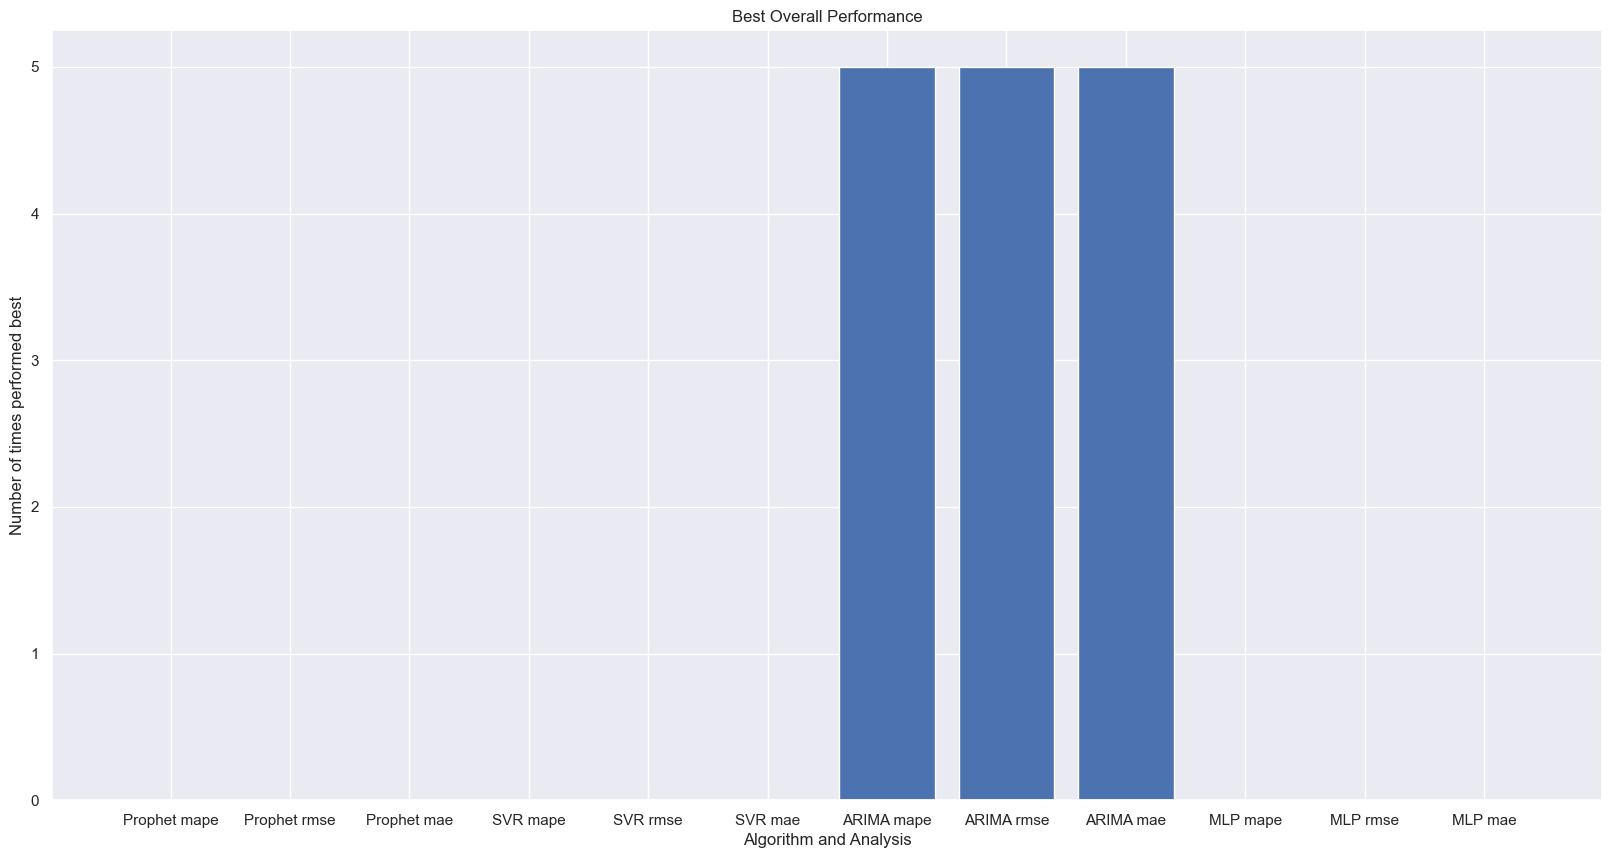

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(20, 10))
plt.title("Best Overall Performance")
plt.xlabel("Algorithm and Analysis")
plt.ylabel("Number of times performed best")
plt.bar(best_performance_df.index, best_performance_df[0])
plt.show()

In [242]:
summary = accuracy_df.describe().loc[["mean", "std"]]

In [243]:
time_series = ["ARIMA", "Prophet"]
ml = ["SVR", "MLP"]

summary_ts = summary.iloc[:, np.array([column in time_series for column in summary.columns.get_level_values(0)])]
summary_ml = summary.iloc[:, np.array([column in ml for column in summary.columns.get_level_values(0)])]
summary_ts.to_latex("ts_summary.txt", multicolumn = True)
summary_ml.to_latex("ml_summary.txt", multicolumn = True)

In [244]:
accuracy_df.describe().loc["mean"]

Algorithm  Metrics
Prophet    rmse       1.642745
           mape       0.047989
           mae        1.046207
SVR        rmse       0.648731
           mape       0.021260
           mae        0.457994
ARIMA      rmse       0.434285
           mape       0.014706
           mae        0.312289
MLP        rmse       0.765101
           mape       0.026044
           mae        0.560439
Name: mean, dtype: float64

In [245]:
time_series = ["ARIMA", "Prophet"]
ml = ["SVR", "MLP"]

accuracy_ts = accuracy_df.iloc[:, np.array([column in time_series for column in accuracy_df.columns.get_level_values(0)])]
accuracy_ml = accuracy_df.iloc[:, np.array([column in ml for column in accuracy_df.columns.get_level_values(0)])]

In [246]:
accuracy_ts.to_latex("accuracy_ts.txt", multicolumn = True)
accuracy_ts

Algorithm   Prophet                         ARIMA                    
Metrics        rmse      mape       mae      rmse      mape       mae
ABEV3      1.279631  0.046870  0.801401  0.300534  0.012516  0.213753
B3SA3      0.867453  0.047493  0.563854  0.259984  0.017178  0.205466
BBDC4      2.007853  0.047372  1.278639  0.469046  0.013485  0.364240
ITSA4      0.847659  0.045661  0.529301  0.181142  0.012213  0.141138
ITUB4      2.434578  0.047384  1.547524  0.530155  0.012918  0.421600
MGLU3      0.583513  0.052271  0.392776  0.213494  0.020516  0.157115
PETR3      2.116171  0.047622  1.349866  0.541116  0.014535  0.411807
PETR4      1.881375  0.047665  1.216235  0.488597  0.014559  0.371412
VALE3      3.637933  0.053009  2.299474  1.171153  0.015989  0.690460
WEGE3      0.771288  0.044545  0.483003  0.187625  0.013149  0.145893

In [247]:
direction_accuracy_df
dir_ac_ts = direction_accuracy_df.iloc[:, np.array([column in time_series for column in direction_accuracy_df.columns.get_level_values(0)])]
dir_ac_ml = direction_accuracy_df.iloc[:, np.array([column in ml for column in direction_accuracy_df.columns.get_level_values(0)])]

dir_ac_ts.to_latex("direction_acc_ts.txt", multicolumn = True)
dir_ac_ml.to_latex("direction_acc_ml.txt", multicolumn = True)

In [248]:
accuracy_ml.to_latex("accuracy_ml.txt", multicolumn = True)
accuracy_ml

Algorithm       SVR                           MLP                    
Metrics        rmse      mape       mae      rmse      mape       mae
ABEV3      0.538668  0.021628  0.367499  0.545983  0.023112  0.394860
B3SA3      0.376406  0.023640  0.279580  0.374833  0.025847  0.300476
BBDC4      0.784988  0.021853  0.590341  0.898809  0.026810  0.721085
ITSA4      0.274940  0.017713  0.204962  0.345551  0.024354  0.279577
ITUB4      0.776003  0.018414  0.601663  0.976872  0.024356  0.790504
MGLU3      0.274333  0.026599  0.203312  0.301260  0.031873  0.230432
PETR3      0.767360  0.020318  0.576126  0.889968  0.024397  0.690984
PETR4      0.703097  0.021005  0.539407  0.801916  0.025250  0.640360
VALE3      1.709719  0.023783  1.019806  2.142766  0.030059  1.282878
WEGE3      0.281795  0.017645  0.197246  0.373049  0.024386  0.273230

In [55]:

index = pd.MultiIndex.from_tuples(tuples, names=["Algorithm", "Metrics"])
df = pd.DataFrame(ambev["0"].to_numpy().reshape(1, -1), index=["AMBEV"],columns=index)
df

Algorithm  Prophet                                                       \
Metrics     return rise accuracy fall accuracy total rise fall accuracy   
AMBEV     -0.01644         0.375      0.631148                 0.504132   

Algorithm                                     SVR                              \
Metrics        rmse      mape       mae    return rise accuracy fall accuracy   
AMBEV      1.143163  0.057755  0.774055 -0.010444         0.525      0.565574   

Algorithm  ...     ARIMA                           MLP                \
Metrics    ...      rmse      mape       mae    return rise accuracy   
AMBEV      ...  0.419745  0.023169  0.304968  0.016342           0.6   

Algorithm                                                                      
Metrics   fall accuracy total rise fall accuracy     rmse      mape       mae  
AMBEV          0.508197                 0.553719  0.58568  0.033106  0.438272  

[1 rows x 28 columns]

In [59]:
df.xs("rise accuracy", level='Metrics', axis=1)

Algorithm,Prophet,SVR,ARIMA,MLP
AMBEV,0.375,0.525,0.533333,0.6


In [68]:

df.iloc[:, ]

Algorithm       Prophet                                                  SVR  \
Metrics   rise accuracy fall accuracy total rise fall accuracy rise accuracy   
AMBEV             0.375      0.631148                 0.504132         0.525   

Algorithm                                                ARIMA                \
Metrics   fall accuracy total rise fall accuracy rise accuracy fall accuracy   
AMBEV          0.565574                 0.545455      0.533333       0.57377   

Algorithm                                    MLP                \
Metrics   total rise fall accuracy rise accuracy fall accuracy   
AMBEV                     0.553719           0.6      0.508197   

Algorithm                           
Metrics   total rise fall accuracy  
AMBEV                     0.553719

In [67]:
np.array([column in accuracy_metrics for column in df.columns.get_level_values(1)])

array([False,  True,  True,  True, False, False, False, False,  True,
        True,  True, False, False, False, False,  True,  True,  True,
       False, False, False, False,  True,  True,  True, False, False,
       False])

In [65]:
df.columns.get_level_values(1) == "return"

array([ True, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False])

In [56]:
df[["rise accuracy", "fall accuracy", "total rise fall accuracy"]]

KeyError: "['rise accuracy' 'fall accuracy' 'total rise fall accuracy'] not in index"

In [32]:
ambev.pivot(index = ["Unnamed: 0"], values=['Algorithm'], columns=index)

KeyError: ('Prophet',)

In [8]:
algos = pd.unique([column.split("-")[0] for column in ambev["Unnamed: 0"]])

In [12]:
import numpy as np

mask_func = lambda x: "Prophet" in x
mask_func = np.vectorize(mask_func)

ambev.index[mask_func(ambev["Unnamed: 0"])]

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')